In [1]:
import pandas as pd
import talib
import yfinance as yf
import matplotlib.pyplot as plt



# Load stock price data into a DataFrame
def load_data(file_path):
    df = pd.read_csv(file_path, parse_dates=['Date'])
    df.set_index('Date', inplace=True)
    return df

# Example usage
file_path = '../../data/yfinance_data/META_historical_data.csv'  # Update the file path as necessary
stock_df = load_data(file_path)
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0
2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0
2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0
2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0
2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0


In [2]:


def calculate_moving_averages(df, short_window=20, long_window=50):
    df['SMA20'] = talib.SMA(df['Close'], timeperiod=short_window)
    df['SMA50'] = talib.SMA(df['Close'], timeperiod=long_window)
    return df

# Example usage
stock_df = calculate_moving_averages(stock_df)

In [3]:
def calculate_rsi(df, timeperiod=14):
    df['RSI14'] = talib.RSI(df['Close'], timeperiod=timeperiod)
    return df

# Example usage
stock_df = calculate_rsi(stock_df)

In [4]:
def calculate_macd(df, fastperiod=12, slowperiod=26, signalperiod=9):
    df['MACD'], df['MACDSignal'], df['MACDHist'] = talib.MACD(
        df['Close'], fastperiod, slowperiod, signalperiod
    )
    return df

# Example usage
stock_df = calculate_macd(stock_df)

In [5]:


def fetch_stock_data(ticker, start_date, end_date):
    # Fetch stock data using yfinance
    stock = yf.download(ticker, start=start_date, end=end_date)
    return stock

# Example usage
ticker = 'AMZN'  # Example ticker symbol
start_date = '2020-01-01'
end_date = '2024-01-01'
stock_data = fetch_stock_data(ticker, start_date, end_date)
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open    Volume
Ticker           AMZN       AMZN       AMZN       AMZN       AMZN      AMZN
Date                                                                       
2020-01-02  94.900497  94.900497  94.900497  93.207497  93.750000  80580000
2020-01-03  93.748497  93.748497  94.309998  93.224998  93.224998  75288000
2020-01-06  95.143997  95.143997  95.184502  93.000000  93.000000  81236000
2020-01-07  95.343002  95.343002  95.694504  94.601997  95.224998  80898000
2020-01-08  94.598503  94.598503  95.550003  94.321999  94.902000  70160000


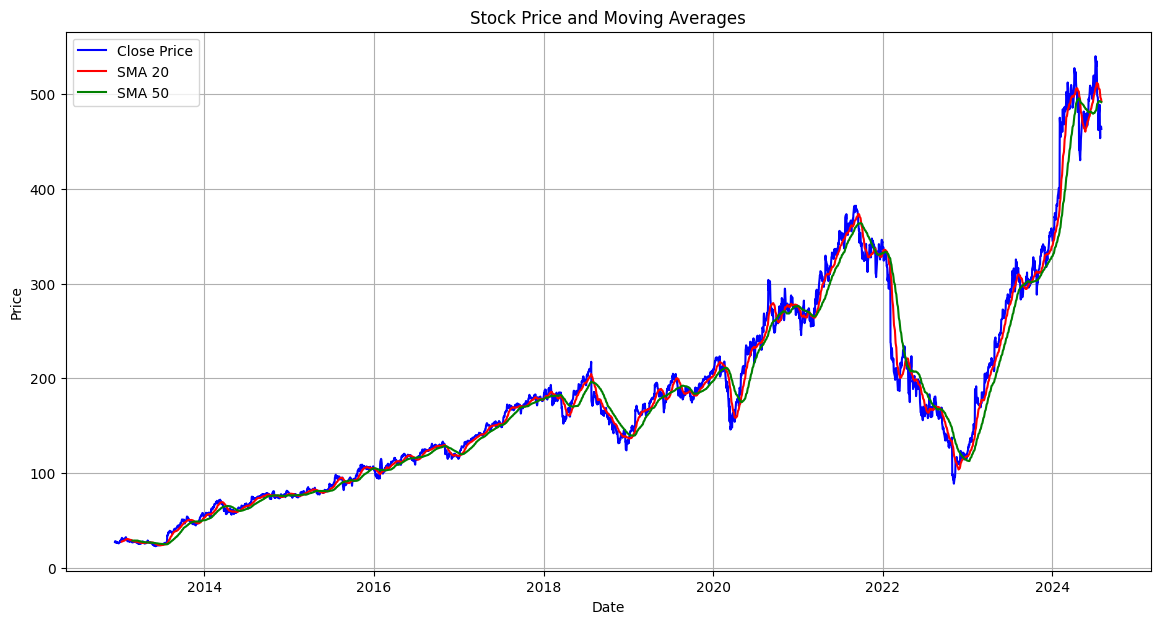

In [6]:


def plot_stock_price_with_moving_averages(df):
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.plot(df.index, df['SMA20'], label='SMA 20', color='red')
    plt.plot(df.index, df['SMA50'], label='SMA 50', color='green')
    plt.title('Stock Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_stock_price_with_moving_averages(stock_df)

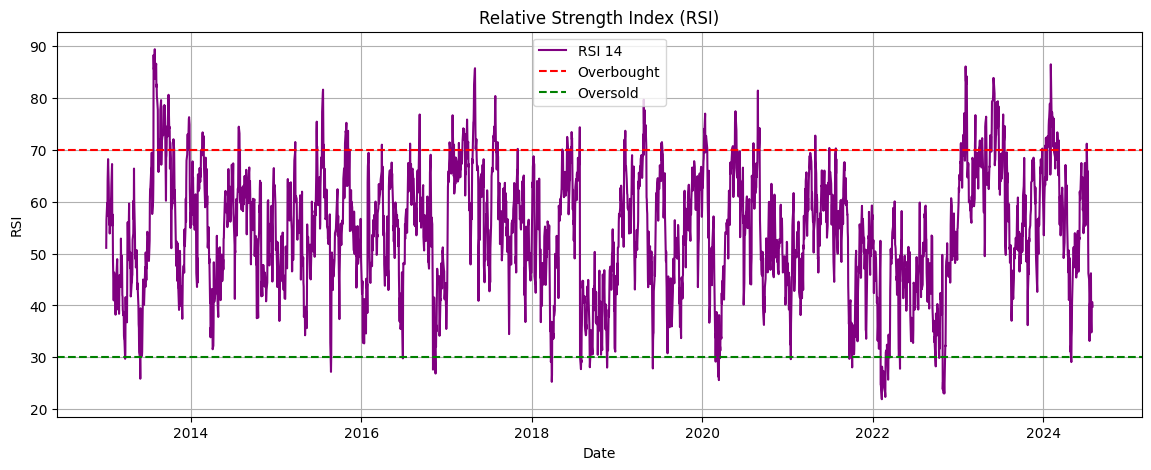

In [7]:
def plot_rsi(df):
    plt.figure(figsize=(14, 5))
    plt.plot(df.index, df['RSI14'], label='RSI 14', color='purple')
    plt.axhline(y=70, color='r', linestyle='--', label='Overbought')
    plt.axhline(y=30, color='g', linestyle='--', label='Oversold')
    plt.title('Relative Strength Index (RSI)')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_rsi(stock_df)

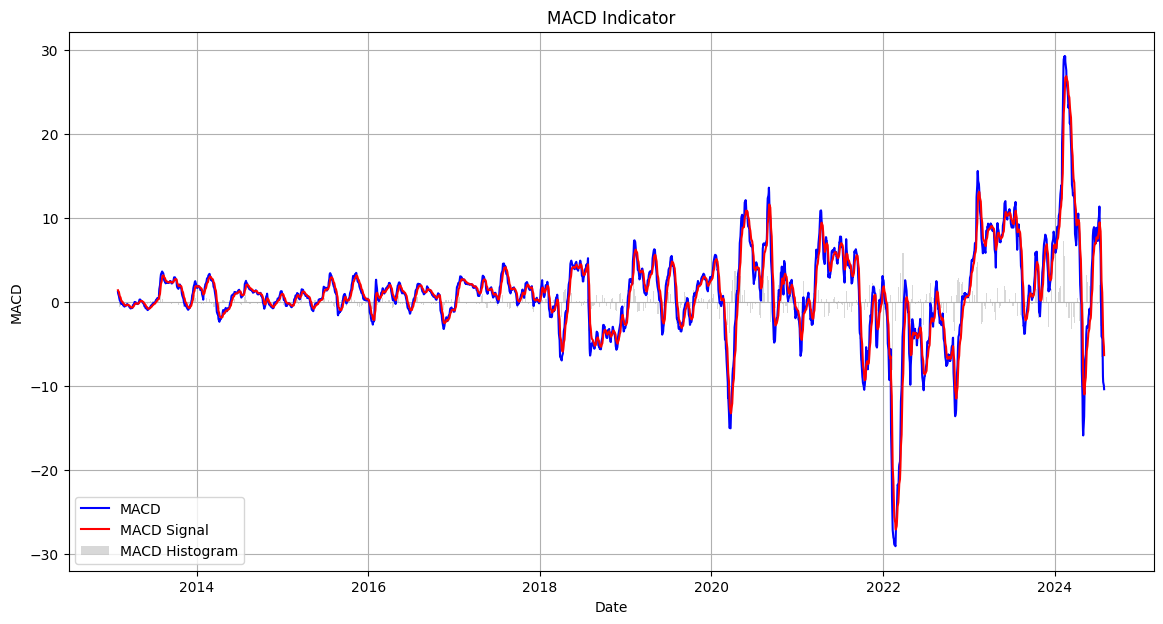

In [8]:
def plot_macd(df):
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['MACD'], label='MACD', color='blue')
    plt.plot(df.index, df['MACDSignal'], label='MACD Signal', color='red')
    plt.bar(df.index, df['MACDHist'], label='MACD Histogram', color='gray', alpha=0.3)
    plt.title('MACD Indicator')
    plt.xlabel('Date')
    plt.ylabel('MACD')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_macd(stock_df)

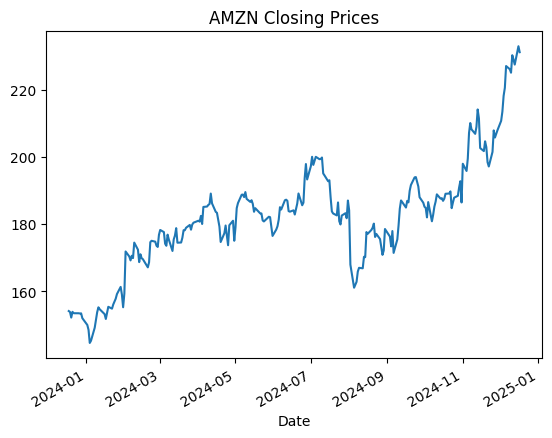

In [9]:


# Fetch historical stock data
stock_data = yf.Ticker('AMZN')  # Apple Inc. ticker symbol
historical_data = stock_data.history(period='1y')  # Get 1-year historical data

# Example: Plot the closing price
historical_data['Close'].plot(title='AMZN Closing Prices')
plt.show()

In [10]:


# Fetch stock data
def fetch_stock_data(ticker, start_date, end_date):
    stock = yf.download(ticker, start=start_date, end=end_date)
    return stock

# Calculate technical indicators
def calculate_indicators(df):
    df['SMA20'] = talib.SMA(df['Close'], timeperiod=20)
    df['SMA50'] = talib.SMA(df['Close'], timeperiod=50)
    df['RSI14'] = talib.RSI(df['Close'], timeperiod=14)
    df['MACD'], df['MACDSignal'], df['MACDHist'] = talib.MACD(df['Close'], 12, 26, 9)
    return df

# Plotting functions
def plot_stock_price(df):
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.plot(df.index, df['SMA20'], label='SMA 20', color='red')
    plt.plot(df.index, df['SMA50'], label='SMA 50', color='green')
    plt.title('Stock Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_rsi(df):
    plt.figure(figsize=(14, 5))
    plt.plot(df.index, df['RSI14'], label='RSI 14', color='purple')
    plt.axhline(y=70, color='r', linestyle='--', label='Overbought')
    plt.axhline(y=30, color='g', linestyle='--', label='Oversold')
    plt.title('Relative Strength Index (RSI)')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_macd(df):
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['MACD'], label='MACD', color='blue')
    plt.plot(df.index, df['MACDSignal'], label='MACD Signal', color='red')
    plt.bar(df.index, df['MACDHist'], label='MACD Histogram', color='gray', alpha=0.3)
    plt.title('MACD Indicator')
    plt.xlabel('Date')
    plt.ylabel('MACD')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
ticker = 'AMZN'
start_date = '2020-01-01'
end_date = '2024-01-01'
stock_df = fetch_stock_data(ticker, start_date, end_date)
stock_df = calculate_indicators(stock_df)
plot_stock_price(stock_df)
plot_rsi(stock_df)
plot_macd(stock_df)

[*********************100%***********************]  1 of 1 completed


TypeError: Argument 'real' has incorrect type (expected numpy.ndarray, got DataFrame)